In [6]:
%pip install networkx
%pip install matplotlib
%pip install tqdm
%pip install pandas
%pip install numpy
%pip install graphviz
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import random
import networkx as nx
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt

# Task 1. Algorithm's analysis

## Generating graph

In [13]:

# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

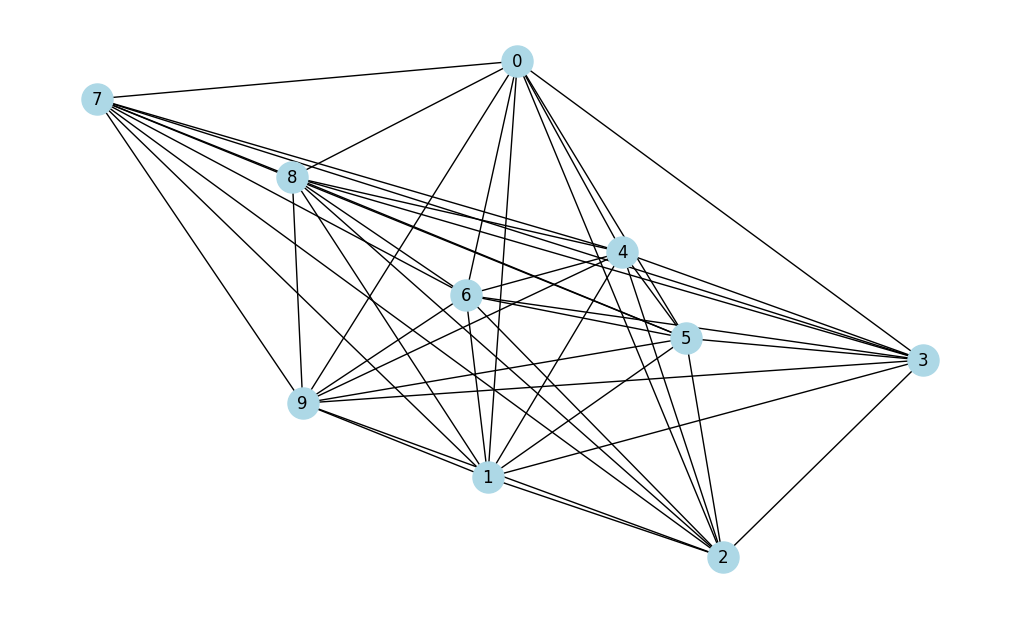

In [14]:
G = gnp_random_connected_graph(10, 1, False, True)

### Prim's algorithm

In [15]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

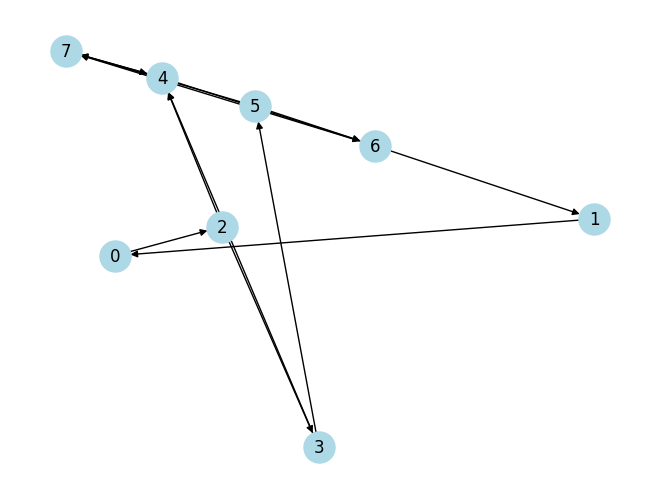

In [118]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)


In [6]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 7), (1, 8), (2, 6), (2, 8), (3, 8), (3, 5), (4, 6), (4, 9), (6, 7)]),
 9)

In [7]:

def prime_algorithm(G):
    result = []
    all_vertex = [0]
    nodes_stack = []
    while len(all_vertex) < len(G.nodes):
        for neighbor in G.neighbors(all_vertex[-1]):
            if neighbor not in all_vertex:
                nodes_stack.append((all_vertex[-1], neighbor))
        min_weight = float('+inf')
        for u, v in nodes_stack:
            if G[u][v]['weight'] < min_weight:
                min_node = (u, v)
                min_weight = G[u][v]['weight']
        nodes_stack.remove(min_node)
        result.append(min_node)
        all_vertex.append(min_node[1])
    return  result        
print(prime_algorithm(mstp))




[(0, 7), (7, 6), (6, 4), (4, 9), (6, 2), (2, 8), (8, 3), (3, 5), (8, 1)]


## Subtask 1.2

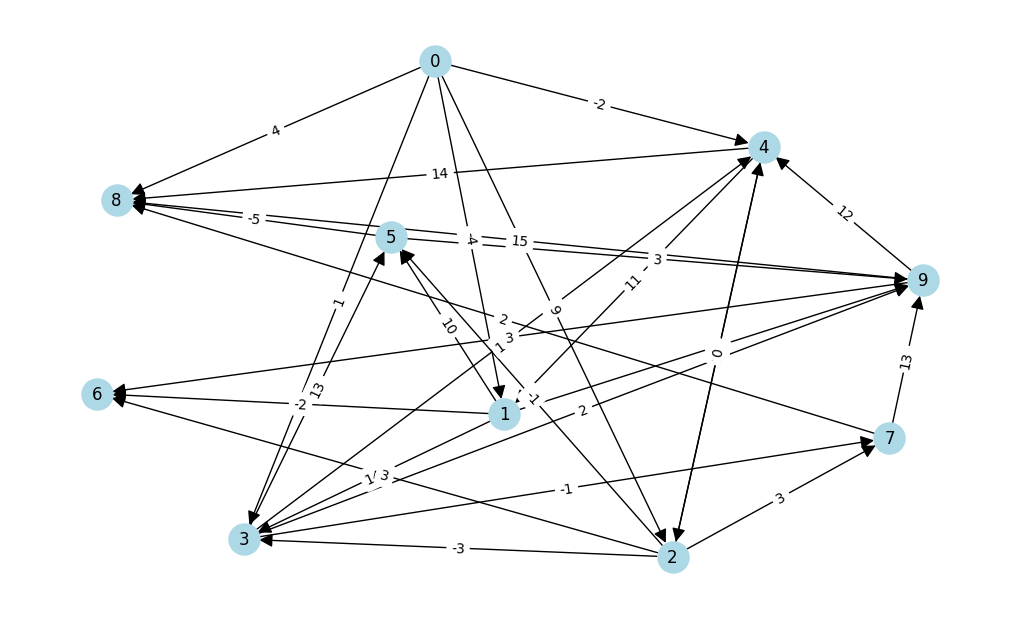

In [5]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Bellman-Ford algorithm

In [6]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 2: -2
Distance to 1: -4
Distance to 3: -5
Distance to 4: -2
Distance to 8: -8
Distance to 5: -3
Distance to 6: -6
Distance to 7: -6
Distance to 9: -3


In [7]:
import math
def bellman_ford_algorithm(graph:nx.DiGraph, source:int = 0):
    num_of_vertices = len(list(graph.nodes()))
    distance = {v : float(math.inf) for v in range(num_of_vertices)}
    distance[source] = 0

    for _ in range(num_of_vertices - 1):
        for v1, v2, w in list(graph.edges(data=True)):
            w = w['weight']
            if distance[v1] + w < distance[v2]:
                distance[v2] = distance[v1] + w
    
    for v1, v2, w in list(graph.edges(data=True)):
        w = w['weight']
        if distance[v1] + w < distance[v2]:
            return "Negative cycle detected"
    result = ''
    for i, dist in distance.items():
        result += '\n'
        result += f'Distance to {i}: {dist}'
    return result

print(bellman_ford_algorithm(G))


Distance to 0: 0
Distance to 1: -4
Distance to 2: -2
Distance to 3: -5
Distance to 4: -2
Distance to 5: -3
Distance to 6: -6
Distance to 7: -6
Distance to 8: -8
Distance to 9: -3


### Floyd-Warshall algorithm

In [65]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 3: 9, 1: 7, 2: 12, 6: 1, 7: 2, 4: 5, 5: 4, 8: 8, 9: 2}
Distances with 1 source: {1: 0, 2: 5, 3: 7, 4: -2, 7: 10, 9: 0, 0: inf, 5: -3, 6: -6, 8: 1}
Distances with 2 source: {2: 0, 8: 5, 3: 18, 4: 9, 7: 5, 9: 5, 0: inf, 1: 12, 5: 8, 6: 5}
Distances with 3 source: {3: 0, 5: 6, 6: 4, 0: inf, 1: 16, 2: 21, 4: 13, 7: 26, 8: 16, 9: 9}
Distances with 4 source: {4: 0, 1: 3, 3: 10, 5: -1, 6: -4, 8: 3, 9: 2, 0: inf, 2: 8, 7: 13}
Distances with 5 source: {5: 0, 6: 3, 9: 3, 0: inf, 1: 10, 2: 15, 3: 17, 4: 7, 7: 20, 8: 10}
Distances with 6 source: {6: 0, 5: 18, 8: 20, 9: 15, 0: inf, 1: 22, 2: 27, 3: 29, 4: 19, 7: 32}
Distances with 7 source: {7: 0, 8: 7, 9: 0, 0: inf, 1: 7, 2: 12, 3: 14, 4: 4, 5: 3, 6: 0}
Distances with 8 source: {8: 0, 9: 10, 0: inf, 1: 17, 2: 22, 3: 24, 4: 14, 5: 13, 6: 10, 7: 27}
Distances with 9 source: {9: 0, 4: 4, 6: 0, 0: inf, 1: 7, 2: 12, 3: 14, 5: 3, 7: 17, 8: 7}


*put your code below* (delete this)

---

## Some useful explanations
### How to get list of edges for your algorithm

In [66]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [67]:
edges[:5]

[(0, 3), (0, 1), (0, 2), (0, 6), (0, 7)]

### To get edges with weights

In [68]:
edges = list(G.edges(data=True))

In [69]:
edges[:5]

[(0, 3, {'weight': 9}),
 (0, 1, {'weight': 7}),
 (0, 2, {'weight': 19}),
 (0, 6, {'weight': 9}),
 (0, 7, {'weight': 2})]

In [70]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [9]:
import time
from tqdm import tqdm

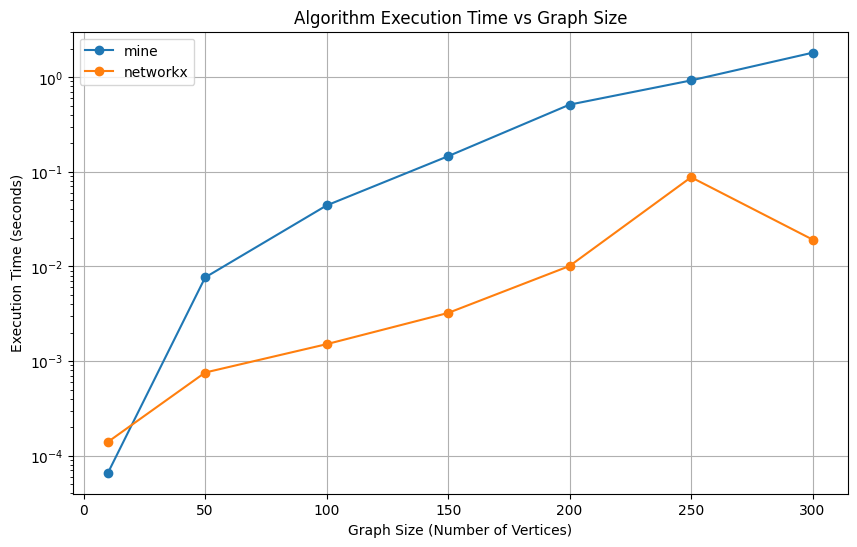

In [12]:
import time
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def measure_execution_time(func, graph, start_node=0):
    start_time = time.time()
    func(graph, start_node)
    return time.time() - start_time

sizes = [10, 50, 100, 150, 200, 250, 300]


functions = {
    'mine': lambda G, _:prime_algorithm(G),
    'networkx': lambda G, _: nx.minimum_spanning_tree(G, algorithm="prim")
}

results = {name: [] for name in functions}


for size in sizes:
    test_graph = gnp_random_connected_graph(size)
    for name, func in functions.items():
        exec_time = measure_execution_time(func, test_graph, 0)
        results[name].append(exec_time)


plt.figure(figsize=(10, 6))
for name, times in results.items():
    plt.plot(sizes, times, marker='o', label=name)

plt.yscale('log')  
plt.title("Algorithm Execution Time vs Graph Size")
plt.xlabel("Graph Size (Number of Vertices)")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()

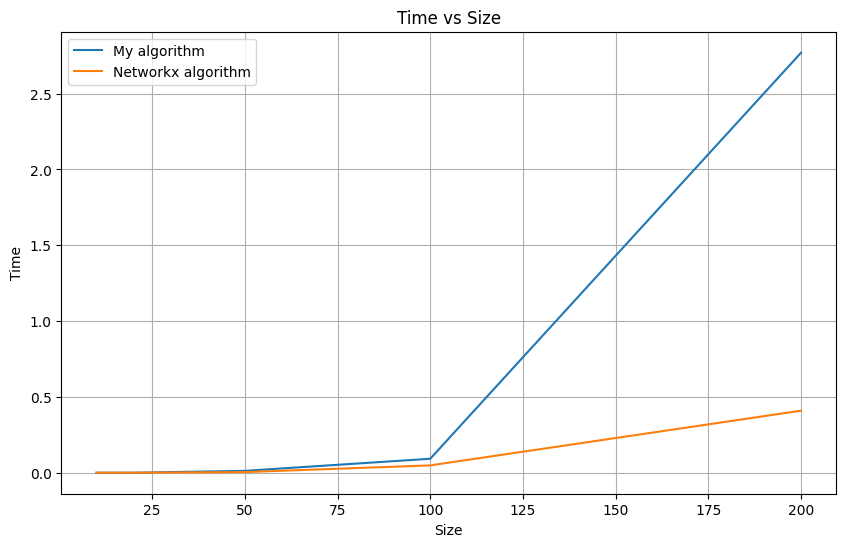

In [13]:
import time
from tqdm import tqdm
sizes = [10, 20, 50, 100, 200]

results_mine = []
results_networkx = []

for num_nodes in sizes:
    min_time_mine = float('inf')
    min_time_networkx = float('inf')
    for _ in range(5):
        G = gnp_random_connected_graph(num_nodes, 0.5, True)
        start = time.time()
        bellman_ford_algorithm(G)
        end = time.time()
        min_time_mine = min(min_time_mine, end - start)
        start = time.time()
        try:
            nx.bellman_ford_predecessor_and_distance(G, 0)
        except:
            pass  
        end = time.time()
        min_time_networkx = min(min_time_networkx, end - start)
    results_mine.append(min_time_mine)
    results_networkx.append(min_time_networkx)

plt.figure(figsize=(10, 6))
plt.plot(sizes, results_mine, label='My algorithm')
plt.plot(sizes, results_networkx, label='Networkx algorithm')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title(f'Time vs Size')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 396.21it/s]


0.0007538454532623291

### Алгоритм Беллмана-Форда
На графах з невеликою кількістю вершин різниця в часі роботи двох алгоритмів не дуже відчутна:

На 20 вершинах: 0.00188с і 0.000984с (1.9 разів)

На 50 вершинах: 0.01412c і 0.01797с (0,78 разів)

Проте на графах з більшою кількістю вершин вона встає більшою:

Наприклад, на 100 вершинах:
4.47701с і 0.44390c (10 разів)

На графах з кількістю вершин більше 1000 вона стане дуже відчутною
Алгоритм Беллмана-Форда з бібліотеки Networkx прайює швидше, тому що:
1. Можливо, має вбудоване припинення роботи, якщо за останню ітерацію жодна відстань не змінилась
2. Використовує більш оптимізовані структури даних


### Алгоритм Пріма
на графі з кількістю вершин до 25, наш алгоритм працює швидше
проте на більшій кількості вершин він значно програє вбудованому.

Наш алгоритм:
ми ітеруємось по сусіднім вершинах останньої врешини доданої до списку пройдених(спершу це 0)
і додаємо ребра утворені вибраною вершиною і сусідніми до списку всіх вершин суміжних з нашим каркасом. 
далі ітеруємося по списку і обираємо найменшу вагу серед них, додачи вершину до списку пройдених.
так повторюємо, доки не пройдемо всі вершини (довжина списку пройдених дорівнює довжені списку вершин даного графа)